In [13]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import PIL.Image as Image
import sys
sys.path.append('../')
from data_loader import *
from models.network_swinir import SwinIR as net
from IPython.display import display
from utils import utils_calculate_psnr_ssim as util
from main_train_classifier import *

In [14]:
OUTPUT_DIR='/home/yossi_gandelsman/test_time_training/second_stage/'
TRAIN_HR_DIR='/home/yossi_gandelsman/test_time_training/datasets/from_zishan/trainValidH/DIV2K_valid_HR_sub/'
TRAIN_TTT_DIR='/home/yossi_gandelsman/test_time_training/first_stage/ttt/div2k/results/'
TRAIN_PRETRAIN_DIR='/home/yossi_gandelsman/test_time_training/first_stage/pretrained/swinir_classical_sr_x4_1_30_23/'
TEST_HR_DIR='/home/yossi_gandelsman/test_time_training/datasets/from_zishan/Set14_kair/original/'
TEST_TTT_DIR='/home/yossi_gandelsman/test_time_training/first_stage/ttt/set14/results/'
TEST_PRETRAIN_DIR='/home/yossi_gandelsman/test_time_training/first_stage/pretrained/set14_swinir/'

In [15]:
path = '/home/yossi_gandelsman/test_time_training/second_stage/0.00001_0.01/checkpoint_swinir_149_0.59_0.59.pth'
device = 'cuda:7'

In [16]:
model = net(upscale=1, in_chans=6, out_chans=1, img_size=48, window_size=8,
            img_range=1., depths=[6, 6, 6, 6, 6, 6, 6], embed_dim=180, num_heads=[6, 6, 6, 6, 6, 6, 6],
            mlp_ratio=2, upsampler='pixelshuffle', resi_connection='1conv', rescale_back=False)
    

pretrained_model = torch.load(path)
model.load_state_dict(pretrained_model, strict=True)
    

<All keys matched successfully>

In [17]:
def prep_image(path):
    image = PIL.Image.open(path)
    image = np.array(image) / 255.
    image = image.transpose(2, 0, 1)
    image = image[np.newaxis,...]
    return torch.from_numpy(image).float()
    
def show_image(path):
    image = PIL.Image.open(path)
    display(image)



pretrained


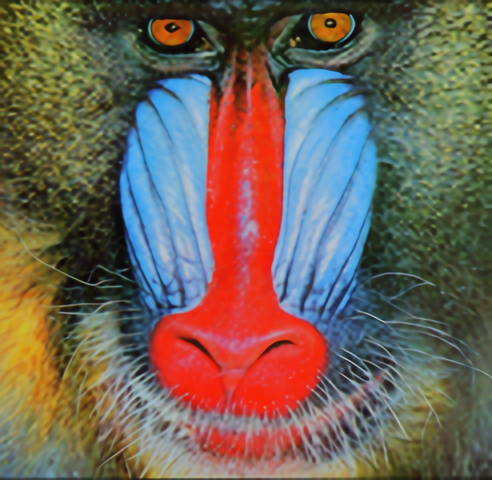

ttt


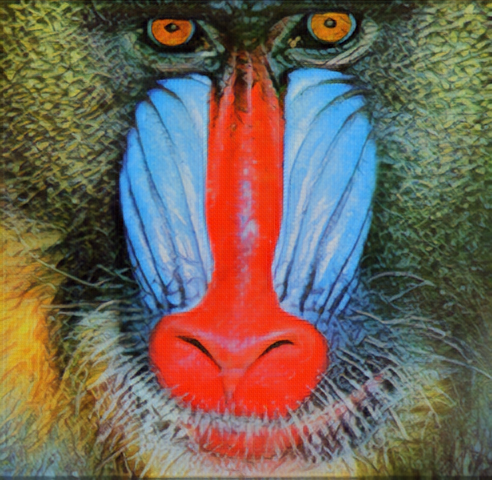

In [18]:
pretrain_input = '/home/yossi_gandelsman/test_time_training/first_stage/pretrained/set14_swinir/baboon.png'
ttt_input = '/home/yossi_gandelsman/test_time_training/first_stage/ttt/set14/results/baboon.png'
print('pretrained')
show_image(pretrain_input)
print('ttt')
show_image(ttt_input)

In [20]:
model.to(device)
merge_and_psnr(model, 
               TEST_TTT_DIR, 
               TEST_PRETRAIN_DIR, 
               TEST_HR_DIR,
               device=device)

100%|█████████████████████████████████████████████████| 14/14 [00:43<00:00,  3.14s/it]

Mean orig psnr: 27.147491804315617
Mean orig ssim: 0.7391682418951669
Mean ttt psnr: 28.853924948348094
Mean ttt ssim: 0.7900928835900768
Mean merged psnr: 27.665640938531077
Mean merged ssim: 0.7635232321318534
Soft mean merged psnr: 28.218657023202095
Soft mean merged ssim: 0.7756423091095019
